# Sales Analysis

## Tools Used: 
MS Excel, MS SQL Server, Tableau

## Problem Statement:
**KPI’s REQUIREMENT**

We need to analyze key indicators for our pizza sales data to gain insights into our business performance. Specifically, we want to calculate the following metrics:

1. Total Revenue: The sum of the total price of all pizza orders.
2. Average Order Value: The average amount spent per order, calculated by dividing the total revenue by the total number of orders.
3. Total Pizzas Sold: The sum of the quantities of all pizzas sold.
4. Total Orders: The total number of orders placed.
5. Average Pizzas Per Order: The average number of pizzas sold per order, calculated by dividing the total number of pizzas sold by the total number of orders.

**CHARTS REQUIREMENT**

We would like to visualize various aspects of our pizza sales data to gain insights and understand key trends. We have identified the following requirements for creating charts:
1. Hourly Trend for Total Pizzas Sold: Create a stacked bar chart that displays the hourly trend of total orders over a specific time period. This chart will help us identify any patterns or fluctuations in order volumes on a hourly basis.
2. Weekly Trend for Total Orders: Create a line chart that illustrates the weekly trend of total orders throughout the year. This chart will allow us to identify peak weeks or periods of high order activity.
3. Percentage of Sales by Pizza Category: Create a pie chart that shows the distribution of sales across different pizza categories. This chart will provide insights into the popularity of various pizza categories and their contribution to overall sales.
4. Percentage of Sales by Pizza Size: Generate a pie chart that represents the percentage of sales attributed to different pizza sizes. This chart will help us understand customer preferences for pizza sizes and their impact on sales.
5. Total Pizzas Sold by Pizza Category: Create a funnel chart that presents the total number of pizzas sold for each pizza category. This chart will allow us to compare the sales performance of different pizza categories.
6. Top 5 Best Sellers by Revenue, Total Quantity and Total Orders Create a bar chart highlighting the top 5 best-selling pizzas based on the Revenue, Total Quantity, Total Orders. This chart will help us identify the most popular pizza options.
7. Bottom 5 Best Sellers by Revenue, Total Quantity and Total Orders Create a bar chart showcasing the bottom 5 worst-selling pizzas based on the Revenue, Total Quantity, Total Orders. This chart will enable us to identify underperforming or less popular pizza options.

## Raw Data
https://drive.google.com/file/d/1z0aqGalPMukpRisjHHgISdfCUc9sWPai/view?usp=drive_link

## SQL QUERIES
### A. KPI’s
#### 1. Total Revenue:

SELECT SUM(total_price) AS Total_Revenue FROM pizza_sales;

#### 2. Average Order Value

SELECT (SUM(total_price) / COUNT(DISTINCT order_id)) AS Avg_order_Value FROM pizza_sales

#### 3. Total Pizzas Sold

SELECT SUM(quantity) AS Total_pizza_sold FROM pizza_sales

#### 4. Total Orders

SELECT COUNT(DISTINCT order_id) AS Total_Orders FROM pizza_sales

#### 5. Average Pizzas Per Order

SELECT CAST(CAST(SUM(quantity) AS DECIMAL(10,2)) / 
CAST(COUNT(DISTINCT order_id) AS DECIMAL(10,2)) AS DECIMAL(10,2))
AS Avg_Pizzas_per_order
FROM pizza_sales

### B. Hourly Trend for Total Pizzas Sold

SELECT DATEPART(HOUR, order_time) as order_hours, SUM(quantity) as total_pizzas_sold
from pizza_sales
group by DATEPART(HOUR, order_time)
order by DATEPART(HOUR, order_time)

### C. Weekly Trend for Orders

SELECT 
    DATEPART(ISO_WEEK, order_date) AS WeekNumber,
    YEAR(order_date) AS Year,
    COUNT(DISTINCT order_id) AS Total_orders
FROM 
    pizza_sales
GROUP BY 
    DATEPART(ISO_WEEK, order_date),
    YEAR(order_date)
ORDER BY 
    Year, WeekNumber;

### D. % of Sales by Pizza Category

SELECT pizza_category, CAST(SUM(total_price) AS DECIMAL(10,2)) as total_revenue,
CAST(SUM(total_price) * 100 / (SELECT SUM(total_price) from pizza_sales) AS DECIMAL(10,2)) AS PCT
FROM pizza_sales
GROUP BY pizza_category

### E. % of Sales by Pizza Size

SELECT pizza_size, CAST(SUM(total_price) AS DECIMAL(10,2)) as total_revenue,
CAST(SUM(total_price) * 100 / (SELECT SUM(total_price) from pizza_sales) AS DECIMAL(10,2)) AS PCT
FROM pizza_sales
GROUP BY pizza_size
ORDER BY pizza_size

### F. Total Pizzas Sold by Pizza Category

SELECT pizza_category, SUM(quantity) as Total_Quantity_Sold
FROM pizza_sales
WHERE MONTH(order_date) = 2
GROUP BY pizza_category
ORDER BY Total_Quantity_Sold DESC

### G. Top 5 Pizzas by Revenue

SELECT Top 5 pizza_name, SUM(total_price) AS Total_Revenue
FROM pizza_sales
GROUP BY pizza_name
ORDER BY Total_Revenue DESC

### H. Bottom 5 Pizzas by Revenue

SELECT Top 5 pizza_name, SUM(total_price) AS Total_Revenue
FROM pizza_sales
GROUP BY pizza_name
ORDER BY Total_Revenue ASC

### I. Top 5 Pizzas by Quantity

SELECT Top 5 pizza_name, SUM(quantity) AS Total_Pizza_Sold
FROM pizza_sales
GROUP BY pizza_name
ORDER BY Total_Pizza_Sold DESC

### J. Bottom 5 Pizzas by Quantity

SELECT TOP 5 pizza_name, SUM(quantity) AS Total_Pizza_Sold
FROM pizza_sales
GROUP BY pizza_name
ORDER BY Total_Pizza_Sold ASC

### K. Top 5 Pizzas by Total Orders

SELECT Top 5 pizza_name, COUNT(DISTINCT order_id) AS Total_Orders
FROM pizza_sales
GROUP BY pizza_name
ORDER BY Total_Orders DESC

### L. Borrom 5 Pizzas by Total Orders

SELECT Top 5 pizza_name, COUNT(DISTINCT order_id) AS Total_Orders
FROM pizza_sales
GROUP BY pizza_name
ORDER BY Total_Orders ASC

## Dashboard
### Dashboard Creaation Steps:
1. KPI's Development in Tableau
2. Creating Dashboard Theme
3. Adding KPI's to Dashboard
4. Charts Development in Tabbleau
5. Adding Charts to Dashboard
6. Adding Navigation Insights

### Complete Dashboard
https://public.tableau.com/views/SALESDATAANALYSIS_17045984198380/PIZZASALESREPORT?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link

In [3]:
%%HTML
<div class='tableauPlaceholder' id='viz1704621245943' style='position: relative'><noscript><a href='#'><img alt='PIZZA SALES REPORT ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;SA&#47;SALESDATAANALYSIS_17045984198380&#47;PIZZASALESREPORT&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='SALESDATAANALYSIS_17045984198380&#47;PIZZASALESREPORT' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;SA&#47;SALESDATAANALYSIS_17045984198380&#47;PIZZASALESREPORT&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1704621245943');                    var vizElement = divElement.getElementsByTagName('object')[0];                    if ( divElement.offsetWidth > 800 ) { vizElement.style.width='1600px';vizElement.style.height='927px';} else if ( divElement.offsetWidth > 500 ) { vizElement.style.width='1600px';vizElement.style.height='927px';} else { vizElement.style.width='100%';vizElement.style.height='2777px';}                     var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

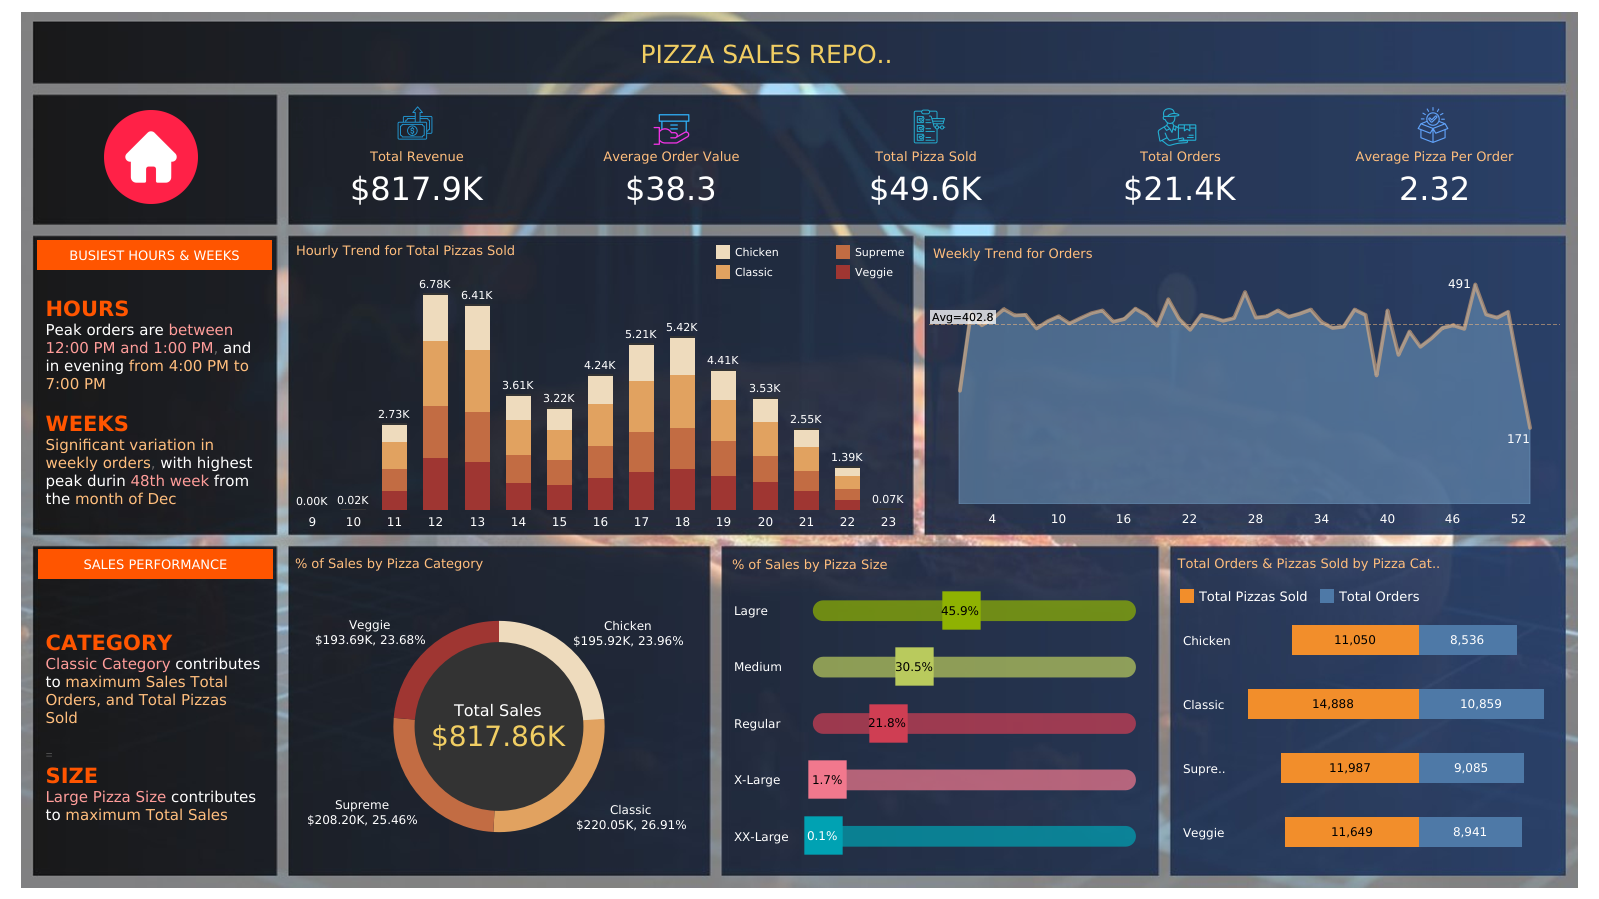